### Imports

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Getting opinions about product from database

In [12]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

107530595
84514582


In [13]:
product_id = input("Please enter product code: ")

In [14]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions
# 84514582

,opinion_id,author,recommend,stars,content_pl,pros_pl,cons_pl,up_votes,down_votes,published,purchased,content_en,pros_en,cons_en
0,12535429,g...6,NaN,3.0,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków]
1,13551598,b...a,1.0,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[]
2,18299406,U...o,1.0,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy]
3,15226709,k...l,1.0,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[]
4,13501735,g...k,NaN,3.5,produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01,produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,13466015,w...d,0.0,1.0,badziew,[],[],1,0,2020-11-28 17:08:14,2020-10-28 14:03:29,badziew,[],[]
82,15730485,b...o,0.0,2.0,POLECAM,[],[],0,0,2022-02-21 10:21:10,2022-02-14 08:19:16,POLECAM,[],[]
83,15798075,b...o,0.0,0.5,polecam,[],[],0,1,2022-03-09 11:10:06,2022-03-08 11:01:43,polecam,[],[]
84,11644241,Użytkownik Ceneo,0.0,1.0,Koszmar. Zmuszenie jej do wydruku graniczy z c...,[],[],3,1,2020-01-26 21:28:27,None,Koszmar. Zmuszenie jej do wydruku graniczy z c...,[],[]


### Calculating basic statistics

In [15]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum()
cons_count = opinions.cons_pl.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool(o.pros_pl) and bool(o.cons_pl), axis=1).sum()
average_stars = opinions.stars.mean()
print(f"Number of opinions about the product: {opinions_count}")
print(f"Number of opinions about the product in which advantages have been listed: {pros_count}")
print(f"Number of opinions about the product in which disadvantages have been listed: {cons_count}")
print(f"Number of opinions about the product in which advantages and disadvantages have been listed: {pros_cons_count}")
print(f"Average score of the product: {average_stars:.2f}")

Number of opinions about the product: 86
Number of opinions about the product in which advantages have been listed: 40
Number of opinions about the product in which disadvantages have been listed: 10
Number of opinions about the product in which advantages and disadvantages have been listed: 8
Average score of the product: 4.38


In [16]:
pros = opinions.pros_en.explode().value_counts()
cons = opinions.cons_en.explode().value_counts()
print(pros)
print(cons)

pros_en
jakość wydruków                  34
szybkość wydruku                 33
jakość wydruku                   28
głośność pracy                   23
wydajność                        15
czyste napełnianie atramentem    11
wydajna                          10
niski koszt wydruku               9
tani atrament                     4
drukowanie poprzez e-mail         3
nowoczesność                      3
doskonały design                  2
innowacyjność                     2
podajnik dokumentów               1
zajmuje mało miejsc               1
Name: count, dtype: int64
cons_en
głośność pracy      7
szybkość wydruku    4
jakość wydruków     3
jakość wydruku      2
Name: count, dtype: int64


### Drawing charts

In [22]:
if not os.path.exists("./pie_charts"):
    os.mkdir("./pie_charts")
if not os.path.exists("./bar_charts"):
    os.mkdir("./bar_charts")

In [23]:
recomendations = opinions.recommend.value_counts(dropna=False).reindex([True, False, np.nan], fill_value=0)
recomendations

recommend
True     73
False     7
NaN       6
Name: count, dtype: int64

In [39]:
recomendations.plot.pie(
    label="",
    labels = ["Recommend","Not recomend", "No oinion"],
    colors= ['forestgreen', 'crimson','steelblue'],
    autopct= lambda r: f"{r:.1f}%" if r >0 else ""
)
plt.title(f"Recomendations for product {product_id}\nTotal number of opinions: {opinions_count}")
plt.savefig(f"./pie_charts/{product_id}.png")
plt.close()

In [34]:
stars = opinions.stars.value_counts().reindex(list(np.arange(0.5,5.5,0.5)), fill_value=0 )
stars

stars
0.5     2
1.0     3
1.5     0
2.0     1
2.5     1
3.0     3
3.5     3
4.0    12
4.5     9
5.0    52
Name: count, dtype: int64

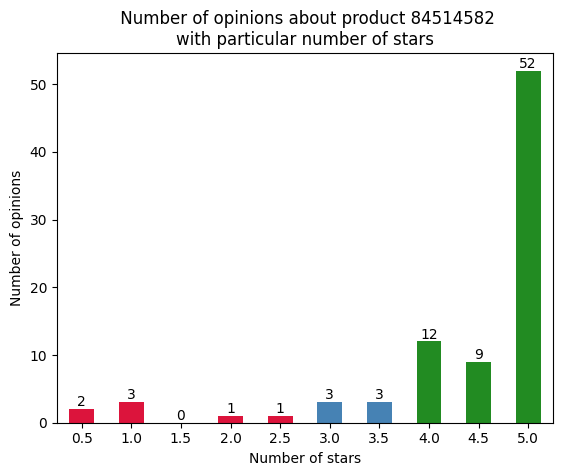

In [38]:
ax = stars.plot.bar(
    color=["forestgreen" if s>3.5 else "crimson" if s<3 else "steelblue" for s in stars.index]
)
plt.bar_label(container=ax.containers[0])
plt.xlabel("Number of stars")
plt.ylabel("Number of opinions")
plt.title(f" Number of opinions about product {product_id}\nwith particular number of stars")
plt.xticks(rotation = 0)
plt.savefig(f"./bar_charts/{product_id}.png")
